In [1]:
import numpy as np 
import pandas as pd

# 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

### The matrix that will be formed by matrix multiplication of a(n,k) and (k,m) matrices will be n x m matrix. number of multiplications will be n*(k-1)*m.

# 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [12]:
#using lists
import time
A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]
def matrix_multiply_list(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result
start_time = time.time()
result_list_of_lists = matrix_multiply_list(A, B)
end_time = time.time()
print(f"List of Lists Time: {end_time - start_time} seconds")
print("Result using list of lists:")
print(result_list_of_lists)



List of Lists Time: 0.0 seconds
Result using list of lists:
[[58, 64], [139, 154]]


In [14]:
#using numpy
A_np = np.array(A)
B_np = np.array(B)
import numpy as np

def matrix_multiply(A, B):
    return np.dot(A, B)
start_time = time.time()
result_numpy = matrix_multiply(A_np, B_np)
end_time = time.time()
print(f"\nNumPy Time: {end_time - start_time} seconds")
print("Result using NumPy:")
print(result_numpy)


NumPy Time: 0.01002645492553711 seconds
Result using NumPy:
[[ 58  64]
 [139 154]]


In [16]:
# 3. 

# 4.What is the gradient of the following function with respect to x and y?  
 ## x$^2$y + y$^3$sin(x)

Partial derivative of $x^2y + y^3sin(x)$ with respect to x is $2xy+y^3cos(x)$   
Partial derivative of $x^2y + y^3sin(x)$ with respect to y is $x^2+3y^2sin(x)$  
Gradient is writtten as vector as $(2xy + y^3cos(x)) \hat{i} + (x^2 + 3y^2sin(x))\hat{j}$

# 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
!pip install jax
import jax 
def fun(x,y):
    return((x**2)*y+(y**3)*jax.numpy.sin(x))
def fun_grad(x,y):
    ans = [2*x*y+(y**3)*jax.numpy.cos(x), x**2+ 3*(y**2)*jax.numpy.sin(x)]
    return jax.numpy.array(ans)
jax_grad = jax.grad(fun,(0,1))
print("function(pi,3.0):{0}".format(fun(jax.numpy.pi,3.0)))
print("gradient using explicit gradient function: {0}".format(fun_grad(jax.numpy.pi,3.0)))
print("gradient using jax: {0}".format(jax_grad(jax.numpy.pi,3.0)))

# 6. Use sympy to confirm that you obtain the same gradient analytically.

In [30]:
from sympy import *
x, y = symbols('x y')
init_printing(use_unicode=True)

diff( ((x**2)*y) + ((y**3)*sin(x)), y)

diff( ((x**2)*y) + ((y**3)*sin(x)), x)

# 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
     1. Branch 1
                1. Roll. Number: 1, Name: N, Marks:
                1. Maths: 100, English: 70 …
     2. Branch 2
2. 2023
     1. Branch 1
     2. Branch 2
3. 2024
     1. Branch 1
     2. Branch 2
4. 2025
     1. Branch 1
     2. Branch 2

## using dictionary

In [34]:
student_records = {
    2022: {
        'Branch 1': [
            {
                'Roll Number': 1,
                'Name': 'N',
                'Marks': {'Maths': 100, 'English': 70}
            },
           
        ],
        'Branch 2': [
        
        ]
    },
    2023: {
        'Branch 1': [],
        'Branch 2': []
    },
    2024: {
        'Branch 1': [],
        'Branch 2': []
    },
    2025: {
        'Branch 1': [],
        'Branch 2': []
    }
}
#example addition
student_records[2022]['Branch 1'].append({
    'Roll Number': 2,
    'Name': 'M',
    'Marks': {'Maths': 90, 'English': 80}
})

for branch_name, students in student_records[2022].items():
    print(f"{2022}\n{branch_name}")
    for student in students:
        print(f"    Roll Number: {student['Roll Number']}, Name: {student['Name']}, Marks: {student['Marks']}")


2022
Branch 1
    Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
    Roll Number: 2, Name: M, Marks: {'Maths': 90, 'English': 80}
2022
Branch 2


## 8. Using classes

In [37]:
class Subject:
    def __init__(self, name, marks):
        self.name = name
        self.marks = marks


class StudentRecord:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch_name, subjects):
        if branch_name not in self.branches:
            self.branches[branch_name] = Branch(branch_name, subjects)

    def add_student(self, branch_name, roll_number, name, marks):
        if branch_name not in self.branches:
            self.add_branch(branch_name, {"Maths": 0, "English": 0})  # Default marks set to 0
        self.branches[branch_name].add_student(roll_number, name, marks)

    def display_records(self):
        print(f"{self.year}")
        for branch_name, branch in self.branches.items():
            branch.display_records()


class Branch:
    subjects = ["Maths", "English"]
    def __init__(self, name, subjects):
        self.name = name
        self.students = []

    def add_student(self, roll_number, name, marks):
        student = Student(roll_number, name, self.subjects, marks)
        self.students.append(student)

    def display_records(self):
        print(f"    {self.name}")
        for student in self.students:
            student.display_info()


class Student:
    def __init__(self, roll_number, name, subjects, marks):
        self.roll_number = roll_number
        self.name = name
        self.subjects = [Subject(subject_name, marks[subject_name]) for subject_name in subjects]

    def display_info(self):
        print(f"        Roll Number: {self.roll_number}, Name: {self.name}, Marks: {', '.join([f'{subject.name}: {subject.marks}' for subject in self.subjects])}")



#record_2022 = StudentRecord(2022)
#record_2022.add_student("Branch 1", 1, "Rakesh", {"Maths": 100, "English": 70})
#record_2022.add_student("Branch 2", 1, "Shyam", {"Maths": 90, "English": 80})

#record_2022.display_records()


In [39]:
# 

In [41]:
import sympy

# 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


1) y = x
2) y = x**2
3) y = x**3/100
4) y = sin(x)
5) y = sin(x)/x
6) y = log(x)
7) y = e**x

In [45]:
x= np.arange(0.5,100,0.5)
y1=x
y2=x**2
y3=x**3/100
y4=np.sin(x)
y5=y4/x
y6=np.log(x)
y7=np.exp(x)

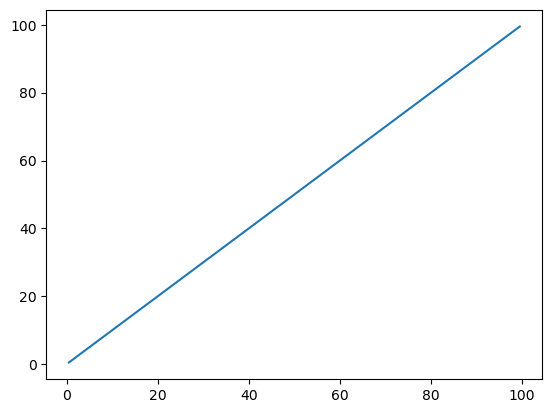

In [47]:
import matplotlib.pyplot as plt
plt.plot(x,y1)
plt.show()

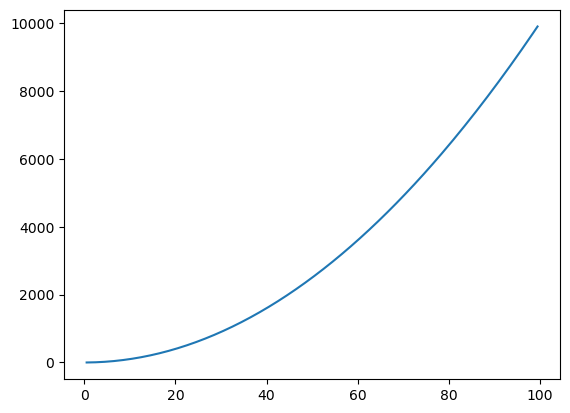

In [49]:
import matplotlib.pyplot as plt

plt.plot(x,y2)

plt.show()

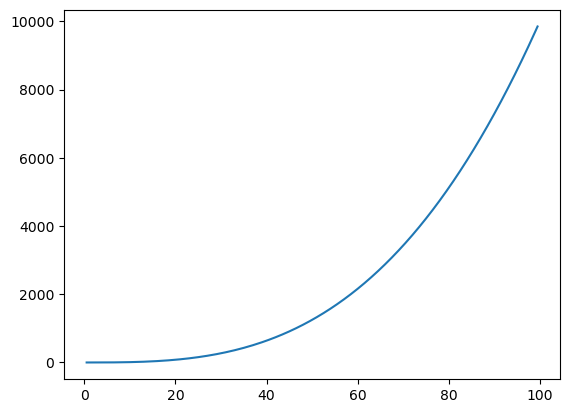

In [51]:
import matplotlib.pyplot as plt

plt.plot(x,y3)

plt.show()

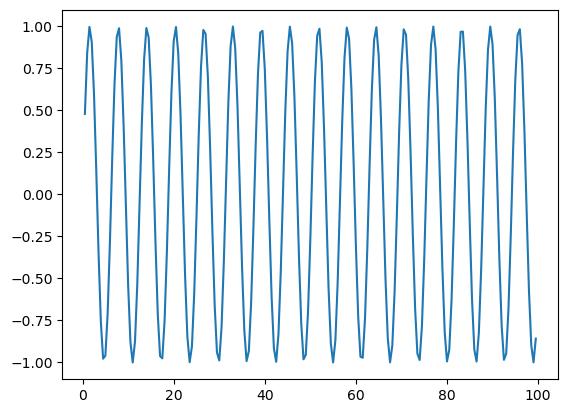

In [53]:
import matplotlib.pyplot as plt

plt.plot(x,y4)

plt.show()

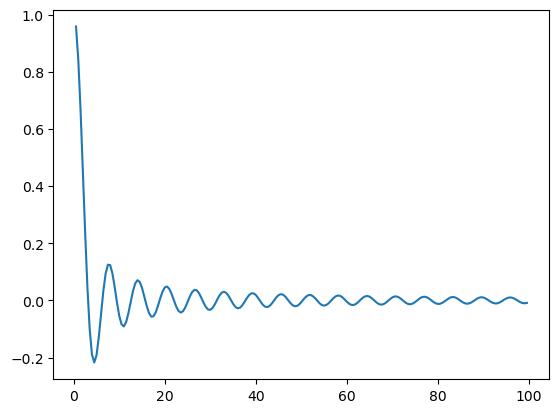

In [55]:
import matplotlib.pyplot as plt

plt.plot(x,y5)

plt.show()

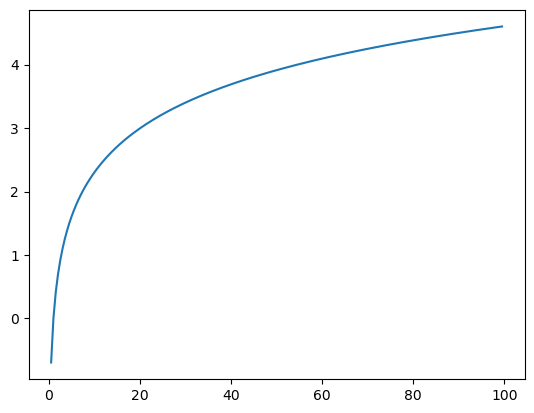

In [57]:
import matplotlib.pyplot as plt

plt.plot(x,y6)

plt.show()

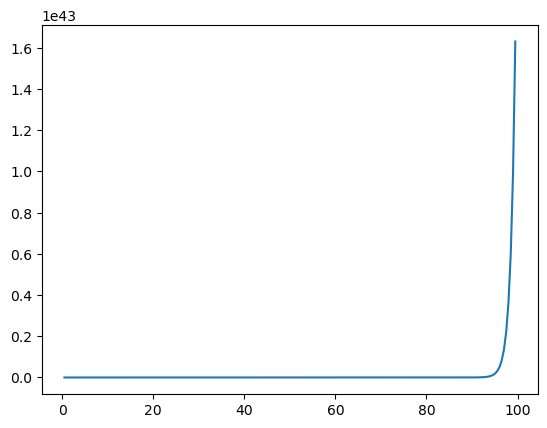

In [59]:
import matplotlib.pyplot as plt

plt.plot(x,y7)
plt.show()

# 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [62]:
import numpy as np
import pandas as pd

matrix_A = np.random.uniform(1, 2, size=(20, 5))
#print(matrix_A)
df_A=pd.DataFrame(matrix_A,columns=['a','b','c','d','e'])
column_with_max_dev=df_A.std(axis=0).idxmax()
row_with_min_mean=df_A.mean(axis=1).idxmin()
print(f"\nColumn with the highest standard deviation: {column_with_max_dev}")
print(f"\nrow with the lowest mean is: {row_with_min_mean}")
df_A['f'] = df_A[['a', 'b', 'c', 'd', 'e']].sum(axis=1)




Column with the highest standard deviation: c

row with the lowest mean is: 18


# 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [65]:
df_A['g'] = np.where(df_A['f'] < 8, 'LT8', 'GT8')

#print(df_A)

num_lt8_rows = df_A[df_A['g'] == 'LT8'].shape[0]
print(f"\nNumber of rows where 'g' is 'LT8': {num_lt8_rows}")

std_lt8 = df_A.loc[df_A['g'] == 'LT8', 'f'].std()
std_gt8 = df_A.loc[df_A['g'] == 'GT8', 'f'].std()

print(f"\nStandard Deviation of 'f' where 'g' is 'LT8': {std_lt8}")
print(f"Standard Deviation of 'f' where 'g' is 'GT8': {std_gt8}")


Number of rows where 'g' is 'LT8': 18

Standard Deviation of 'f' where 'g' is 'LT8': 0.44992417599266005
Standard Deviation of 'f' where 'g' is 'GT8': 0.04031914519285334


# 12. Write a small piece of code to explain broadcasting in numpy.

## Broadcasting in numpy is how numpy treats arrays with different shapes during algebraic operations.
 

In [69]:
import numpy as np
a=np.array([1,2,3,4])
b=np.array([4,3,2,1])
print(a*b)

[4 6 6 4]


# 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

## Without argmin

In [73]:
import numpy as np
arr = []
n = int(input("Array length:"))
for i in range(n):
    arr.append(float(input("Element:")))
arr = np.array(arr)
length = len(arr)
min = arr[0]
minind = 0
for i in range(1,length):
    if arr[i] < min:
        min = arr[i]
        minind= i
print('Index of minimum value is: {} and value is {}'.format(minind,min))

Array length: 5
Element: 4
Element: 5
Element: 6
Element: 7
Element: 5


Index of minimum value is: 0 and value is 4.0


## With argmin

In [75]:
import numpy as np
arr = []
n = int(input("Array length:"))
for i in range(n):
    arr.append(float(input("Element:")))
arr = np.array(arr)
arr1= np.argmin(arr)
print('Smallest Element index is:{}'.format(arr1))

Array length: 5
Element: 6
Element: 7
Element: 7
Element: 8
Element: 3


Smallest Element index is:4
